In [25]:
import pandas as pd

ROOT_DIR = "../results/2025-01-17 18:36:27"

### Overlap operation speedup - bioframe as a baseline (single-thread)

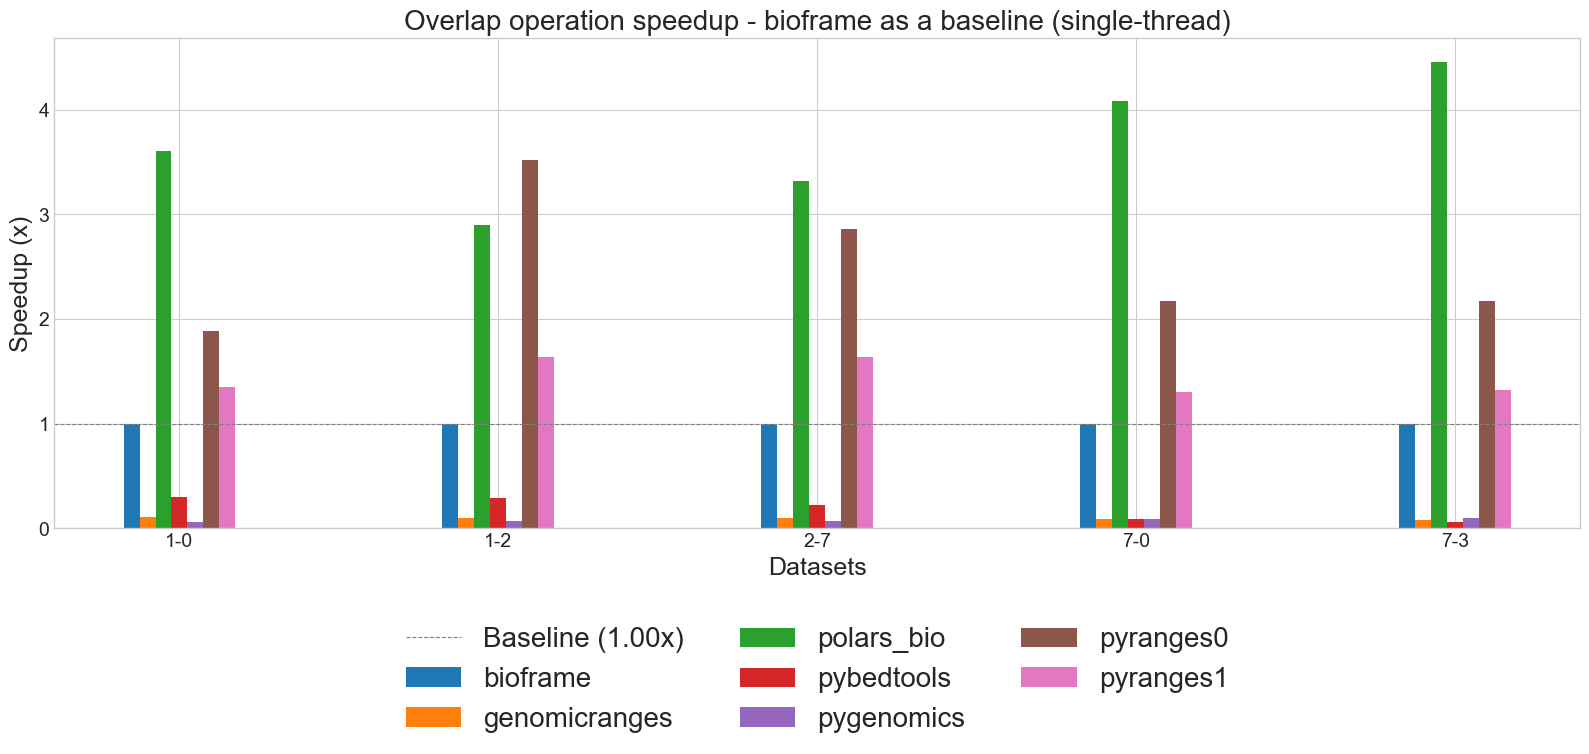

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# plt.style.use('tableau-colorblind10')
plt.style.use("seaborn-v0_8-whitegrid")
data = {
    "datasets": ["1-2"] * 7 + ["1-0"] * 7 + ["2-7"] * 7 + ["7-0"] * 7 + ["7-3"] * 7,
    "library": [
        "polars_bio",
        "bioframe",
        "pyranges0",
        "pyranges1",
        "pybedtools",
        "genomicranges",
        "pygenomics",
    ]
    * 5,
    "speedup": pd.read_csv(f"{ROOT_DIR}/overlap-single_1-2.csv")
    .Speedup.str.replace("x", "")
    .astype(float)
    .tolist()
    + pd.read_csv(f"{ROOT_DIR}/overlap-single_1-0.csv")
    .Speedup.str.replace("x", "")
    .astype(float)
    .tolist()
    + pd.read_csv(f"{ROOT_DIR}/overlap-single_2-7.csv")
    .Speedup.str.replace("x", "")
    .astype(float)
    .tolist()
    + pd.read_csv(f"{ROOT_DIR}/overlap-single_7-0.csv")
    .Speedup.str.replace("x", "")
    .astype(float)
    .tolist()
    + pd.read_csv(f"{ROOT_DIR}/overlap-single_7-3.csv")
    .Speedup.str.replace("x", "")
    .astype(float)
    .tolist(),
}

# Create a DataFrame
df = pd.DataFrame(data)

# Pivot the data for easier plotting
pivot_df = df.pivot(index="datasets", columns="library", values="speedup")

# Plot setup
x = np.arange(len(pivot_df))  # x positions for queries
width = 0.05  # Bar width
libraries = pivot_df.columns  # List of libraries

# Initialize plot
plt.figure(figsize=(16, 6))

# Plot each library's data
for i, library in enumerate(libraries):
    plt.bar(x + i * width, pivot_df[library], width, label=library)

# Add details
plt.xticks(x + width * (len(libraries) - 1) / 2, pivot_df.index, fontsize=14)
plt.yticks(fontsize=14)
plt.axhline(
    y=1.0, color="gray", linestyle="--", linewidth=0.8, label="Baseline (1.00x)"
)
plt.title(
    "Overlap operation speedup - bioframe as a baseline (single-thread)", fontsize=20
)
plt.xlabel("Datasets", fontsize=18)
plt.ylabel("Speedup (x)", fontsize=18)
plt.legend(title="Library")
plt.tight_layout()
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=20)


# Show the chart
plt.show()

In [ ]:
print(plt.style.available)